In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np

In [2]:
circ = QuantumCircuit(3)
# section Enigme
circ.h(0)
circ.h(2)
circ.cx(0,1)
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)
# section Résolution
circ.barrier()
circ.swap(0,1)
circ.x(0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)

In [3]:
# measure the qubits
circ.measure_all()


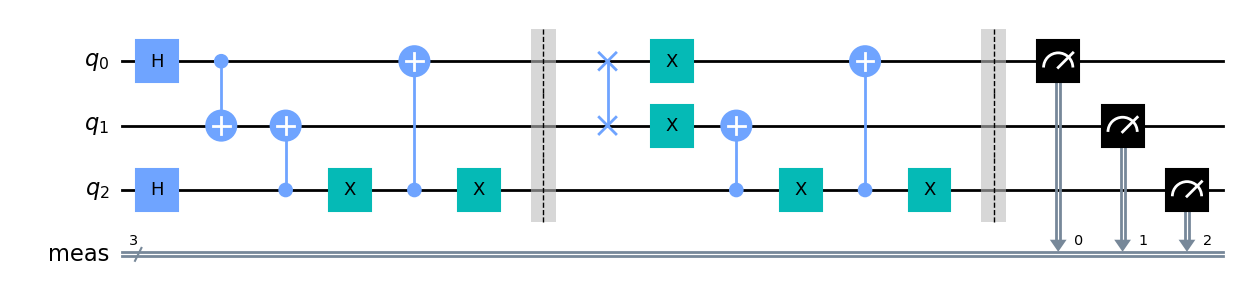

In [4]:
circ.draw(output='mpl')

In [5]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ, shots=100000)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


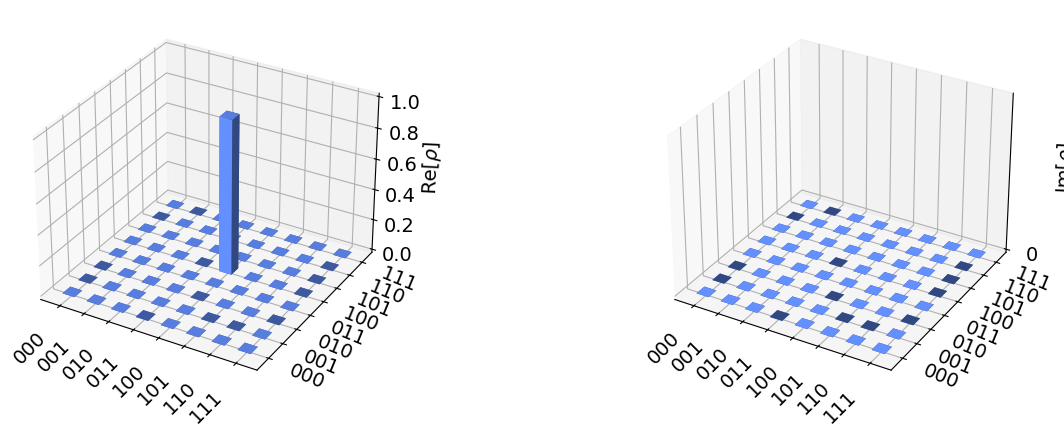

In [6]:
from qiskit.visualization import plot_state_city

plot_state_city(outputstate)

In [7]:
# print histogram
counts = result.get_counts(circ)

In [8]:
from qiskit.visualization import plot_histogram

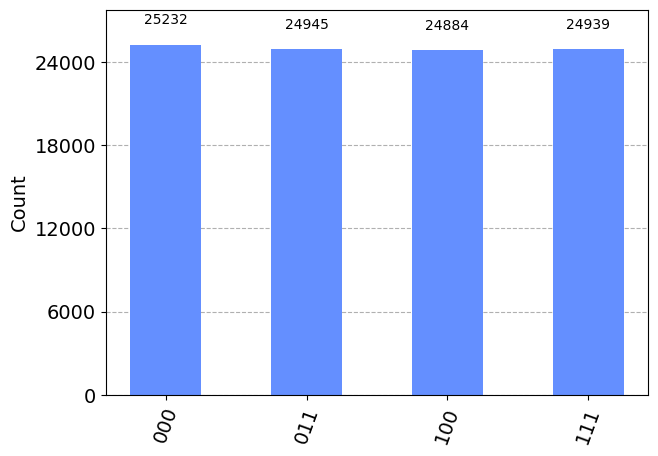

In [9]:
plot_histogram(counts)